# Automatic Review Analyzer

## Sentiment Analysis with Machine Learning

## Objective:
The landscape of online shopping is rich with customer feedback, a potential asset for businesses and future consumers alike. The *Automatic Review Analyzer* project harnesses the power of **machine learning** to distill customer reviews into actionable insights. Focusing on Amazon's food product reviews, this system employs **sentiment analysis** to categorize feedback as positive or negative, providing an automated, efficient, and scalable approach to handling customer reviews. This project is an example of a **classification** task in machine learning, because it classifies the reviews as 'positive' or 'negative'.

## Technical Synopsis:
This sentiment analysis project operates on the frontline of customer feedback processing. The project involves:

1. **Implementation of Linear Classifiers**: The core mechanics of the review analyzer rest on three distinct linear classifiers:
    - *Perceptron Algorithm*: A foundational yet robust algorithm known for its effectiveness in binary classification tasks.
    - *Average Perceptron Algorithm*: An enhancement of the standard perceptron, designed to stabilize and improve the quality of the predictions.
    - *Pegasos Algorithm*: A sophisticated approach that combines the principles of margin maximization (seen in Support Vector Machines) with a computation-friendly framework, ideal for large datasets.

2. **Feature Engineering in Text Analysis**: Beyond the classifiers, the project explores the realm of **text data processing**. By transforming raw review text into a structured format ("features"), the system can effectively interpret and analyze content. Initial features were based on simple word frequencies, providing a baseline for performance comparison.

3. **Experimental Exploration**: The project embraces an experimental ethos, probing beyond conventional methodologies. It investigates the impact of various text features on classification performance, revealing insights into data nuances and classifier sensitivities.

## Real-World Implications:
The implications of this analyzer are far-reaching:

1. **For Businesses**: Offers an automated, efficient system for gauging public sentiment, allowing for agile response strategies, quality improvement, and product development insights.

2. **For Consumers**: Reflects a marketplace that values customer feedback, potentially guiding future shoppers in their decision-making processes.

3. **For Learners**: Offers a hands-on learning experience, bridging theoretical understanding with practical skills in machine learning, text analysis, and sentiment classification, thereby fostering critical thinking, problem-solving, and real-world application. 



# Introduction and Setup

Import modules, and load the data.

In [1]:
import sys
sys.path.append('../src')

import sentiment_analysis as sa
import utils
import numpy as np

train_data = utils.load_data('../data/reviews_train.tsv')
val_data = utils.load_data('../data/reviews_val.tsv')
test_data = utils.load_data('../data/reviews_test.tsv')

train_texts, train_labels = zip(*((sample['text'], sample['sentiment']) for sample in train_data))
val_texts, val_labels = zip(*((sample['text'], sample['sentiment']) for sample in val_data))
test_texts, test_labels = zip(*((sample['text'], sample['sentiment']) for sample in test_data))

dictionary = sa.bag_of_words(train_texts)

train_bow_features = sa.extract_bow_feature_vectors(train_texts, dictionary)
val_bow_features = sa.extract_bow_feature_vectors(val_texts, dictionary)
test_bow_features = sa.extract_bow_feature_vectors(test_texts, dictionary) 


# Analyse Toy Dataset

Load a toy dataset, apply three different perceptron-based algorithms - Perceptron, Average Perceptron, and Pegasos - to train models on the dataset, and then plot the results of these algorithms, including their decision boundaries.

The output indicates the learned model parameters (theta values) and bias terms (theta_0 values).

theta for Perceptron is 1.8809999999999982, 3.8159999999999963
theta_0 for Perceptron is -5.0


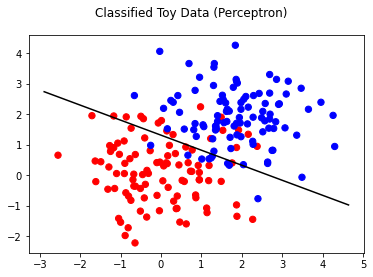

theta for Average Perceptron is 2.425476, 2.6097040000000176
theta_0 for Average Perceptron is -4.732


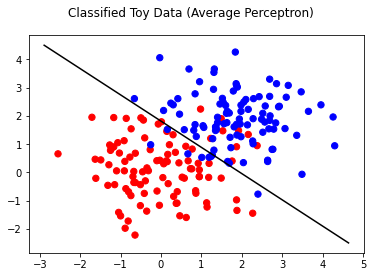

theta for Pegasos is 0.6878962360013456, 0.7620653856493942
theta_0 for Pegasos is -1.1216660077128084


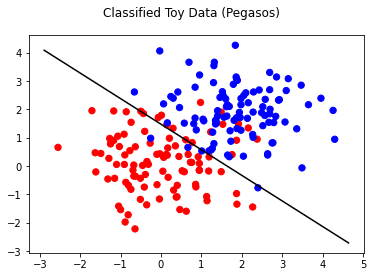

In [2]:
# Import necessary modules and functions, including 'utils', 'sa' (a module for perceptron algorithms),
# and 'toy_data' (which contains toy dataset and labels).

toy_features, toy_labels = toy_data = utils.load_toy_data('../data/toy_data.tsv')

# Define two constants 'T' and 'L'.
T = 10 # Number of iterations or epochs for training
L = 0.2 # A regularization parameter (for the Pegasos algorithm)

# Apply the perceptron, average perceptron, and Pegasos algorithms to the toy dataset.
thetas_perceptron = sa.perceptron(toy_features, toy_labels, T)
thetas_avg_perceptron = sa.average_perceptron(toy_features, toy_labels, T)
thetas_pegasos = sa.pegasos(toy_features, toy_labels, T, L)

# Define a function 'plot_toy_results' that takes an algorithm name ('algo_name') 
# and a set of theta values ('thetas') as input.
def plot_toy_results(algo_name, thetas):
    # Print the theta values for the algorithm.
     print('theta for', algo_name, 'is', ', '.join(map(str,list(thetas[0]))))
    # Print the theta_0 (bias) value for the algorithm.
     print('theta_0 for', algo_name, 'is', str(thetas[1]))
    # Plot the toy dataset with decision boundary determined by the algorithm.
     utils.plot_toy_data(algo_name, toy_features, toy_labels, thetas)

# Call the 'plot_toy_results' function to plot results for each algorithm.
plot_toy_results('Perceptron', thetas_perceptron)
plot_toy_results('Average Perceptron', thetas_avg_perceptron)
plot_toy_results('Pegasos', thetas_pegasos)

# Evaluate Algorithms with Text Classification

Evaluate the three perceptron-based algorithms on the text classification task using different hyperparameters (T and L).

We calculate and display training and validation accuracies for each algorithm.


In [3]:
T = 10 # Number of iterations or epochs for training
L = 0.01 # A regularization parameter (for the Pegasos algorithm)

# Calculate training and validation accuracies for the perceptron algorithm
pct_train_accuracy, pct_val_accuracy = \
   sa.classifier_accuracy(sa.perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)

# Print the training and validation accuracies for the perceptron algorithm
print("{:35} {:.4f}".format("Training accuracy for perceptron:", pct_train_accuracy))
print("{:35} {:.4f}".format("Validation accuracy for perceptron:", pct_val_accuracy))

# Calculate training and validation accuracies for the average perceptron algorithm
avg_pct_train_accuracy, avg_pct_val_accuracy = \
   sa.classifier_accuracy(sa.average_perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)

# Print the training and validation accuracies for the average perceptron algorithm
print("{:43} {:.4f}".format("Training accuracy for average perceptron:", avg_pct_train_accuracy))
print("{:43} {:.4f}".format("Validation accuracy for average perceptron:", avg_pct_val_accuracy))

# Calculate training and validation accuracies for the Pegasos algorithm
avg_peg_train_accuracy, avg_peg_val_accuracy = \
   sa.classifier_accuracy(sa.pegasos, train_bow_features,val_bow_features,train_labels,val_labels,T=T,L=L)
# Print the training and validation accuracies for the Pegasos algorithm.
print("{:50} {:.4f}".format("Training accuracy for Pegasos:", avg_peg_train_accuracy))
print("{:50} {:.4f}".format("Validation accuracy for Pegasos:", avg_peg_val_accuracy))


Training accuracy for perceptron:   0.9293
Validation accuracy for perceptron: 0.7620
Training accuracy for average perceptron:   0.9770
Validation accuracy for average perceptron: 0.7960
Training accuracy for Pegasos:                     0.9042
Validation accuracy for Pegasos:                   0.7960


# Tune Hyperparameters of Algorithms on Text Classification

Tune hyperparameters and evaluate the three perceptron-based algorithms on the text classification task.  

perceptron valid: [(1, 0.75), (5, 0.768), (10, 0.762), (15, 0.772), (25, 0.782), (50, 0.778)]
best = 0.7820, T=25.0000
avg perceptron valid: [(1, 0.788), (5, 0.798), (10, 0.796), (15, 0.802), (25, 0.792), (50, 0.784)]
best = 0.8020, T=15.0000
Pegasos valid: tune T [(1, 0.758), (5, 0.794), (10, 0.796), (15, 0.796), (25, 0.802), (50, 0.794)]
best = 0.8020, T=25.0000
Pegasos valid: tune L [(0.001, 0.788), (0.01, 0.802), (0.1, 0.758), (1, 0.578), (10, 0.518)]
best = 0.8020, L=0.0100


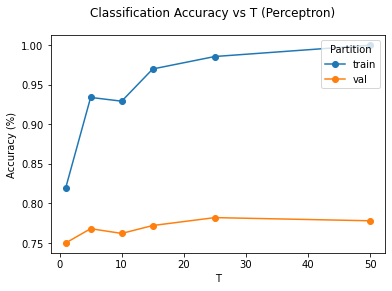

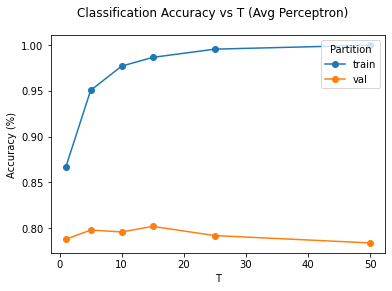

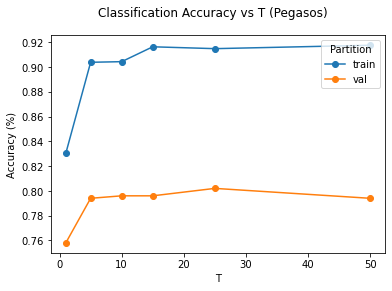

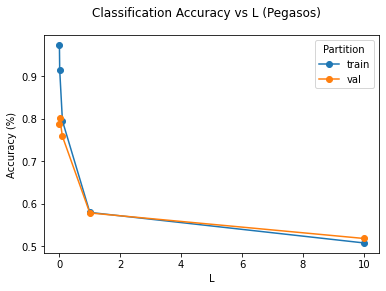

In [4]:
# Create a tuple 'data' containing training and validation data.
data = (train_bow_features, train_labels, val_bow_features, val_labels)

# Define lists of hyperparameters 'Ts' and 'Ls' to try during tuning.
Ts = [1, 5, 10, 15, 25, 50]
Ls = [0.001, 0.01, 0.1, 1, 10]

# Tune perceptron hyperparameter 'T' and report results.
pct_tune_results = utils.tune_perceptron(Ts, *data)
print('perceptron valid:', list(zip(Ts, pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(pct_tune_results[1]), Ts[np.argmax(pct_tune_results[1])]))

# Tune average perceptron hyperparameter 'T' and report results.
avg_pct_tune_results = utils.tune_avg_perceptron(Ts, *data)
print('avg perceptron valid:', list(zip(Ts, avg_pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(avg_pct_tune_results[1]), Ts[np.argmax(avg_pct_tune_results[1])]))

# Fix 'L' and tune Pegasos hyperparameter 'T', then report results.
fix_L = 0.01
peg_tune_results_T = utils.tune_pegasos_T(fix_L, Ts, *data)
print('Pegasos valid: tune T', list(zip(Ts, peg_tune_results_T[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(peg_tune_results_T[1]), Ts[np.argmax(peg_tune_results_T[1])]))

# Fix 'T' and tune Pegasos hyperparameter 'L', then report results.
fix_T = Ts[np.argmax(peg_tune_results_T[1])]
peg_tune_results_L = utils.tune_pegasos_L(fix_T, Ls, *data)
print('Pegasos valid: tune L', list(zip(Ls, peg_tune_results_L[1])))
print('best = {:.4f}, L={:.4f}'.format(np.max(peg_tune_results_L[1]), Ls[np.argmax(peg_tune_results_L[1])]))

# Plot tuning results for each algorithm and hyperparameter.
utils.plot_tune_results('Perceptron', 'T', Ts, *pct_tune_results)
utils.plot_tune_results('Avg Perceptron', 'T', Ts, *avg_pct_tune_results)
utils.plot_tune_results('Pegasos', 'T', Ts, *peg_tune_results_T)
utils.plot_tune_results('Pegasos', 'L', Ls, *peg_tune_results_L)

# Test the Test Dataset with Optimal Hyperparameters

Use the best algorithm along with the optimal hyperparameters according to validation accuracies to test against the test dataset. 

The test data is provided as test_bow_features and test_labels.

theta for Perceptron is 1.8809999999999982, 3.8159999999999963
theta_0 for Perceptron is -5.0


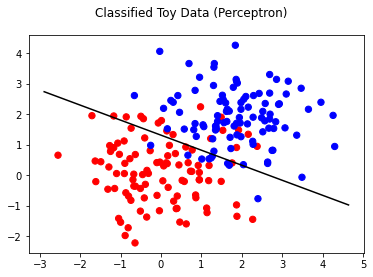

theta for Average Perceptron is 2.425476, 2.6097040000000176
theta_0 for Average Perceptron is -4.732


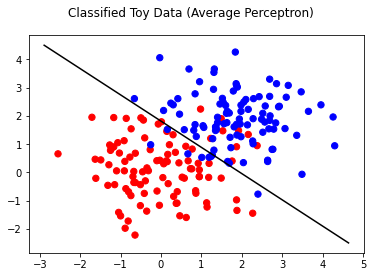

theta for Pegasos is 0.6878962360013456, 0.7620653856493942
theta_0 for Pegasos is -1.1216660077128084


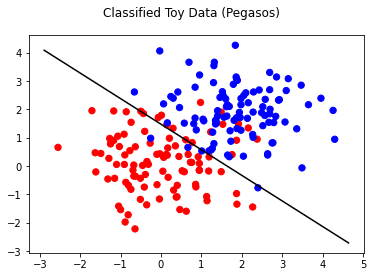

Training accuracy for perceptron:   0.9293
Validation accuracy for perceptron: 0.7620
Training accuracy for average perceptron:   0.9770
Validation accuracy for average perceptron: 0.7960
Training accuracy for Pegasos:                     0.9042
Validation accuracy for Pegasos:                   0.7960
perceptron valid: [(1, 0.75), (5, 0.768), (10, 0.762), (15, 0.772), (25, 0.782), (50, 0.778)]
best = 0.7820, T=25.0000
avg perceptron valid: [(1, 0.788), (5, 0.798), (10, 0.796), (15, 0.802), (25, 0.792), (50, 0.784)]
best = 0.8020, T=15.0000
Pegasos valid: tune T [(1, 0.758), (5, 0.794), (10, 0.796), (15, 0.796), (25, 0.802), (50, 0.794)]
best = 0.8020, T=25.0000
Pegasos valid: tune L [(0.001, 0.788), (0.01, 0.802), (0.1, 0.758), (1, 0.578), (10, 0.518)]
best = 0.8020, L=0.0100


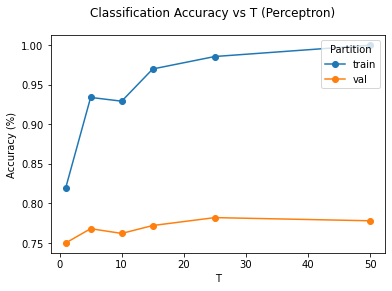

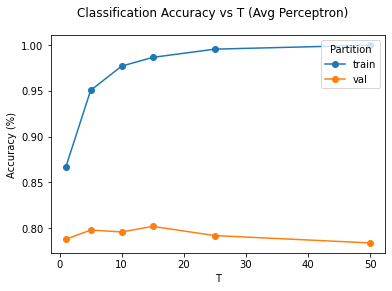

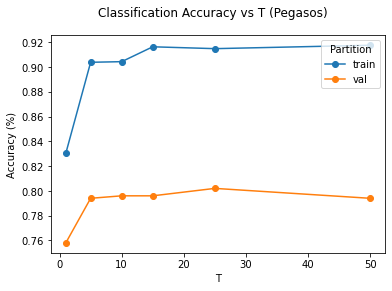

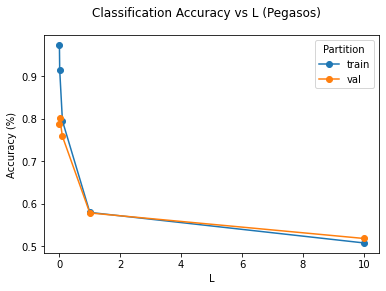

Accuracy on the test set: 0.8100
Test accuracy with stopwords removed: 0.8080
Test accuracy with stopwords removed and counts features: 0.7760
Top 1: recommend
Top 2: great
Top 3: perfect
Top 4: love
Top 5: best
Top 6: wonderful
Top 7: delicious
Top 8: favorite
Top 9: loves
Top 10: excellent
Top 1: bad
Top 2: disappointed
Top 3: money
Top 4: however
Top 5: didn
Top 6: ok
Top 7: unfortunately
Top 8: fine
Top 9: worst
Top 10: nibs
Most Explanatory Word Features
['great', 'delicious', '!', 'best', 'wonderful', 'love', 'perfect', 'loves', 'glad', 'excellent']
Accuracy on the test set: 0.8100


In [5]:
import numpy as np
from main import test_bow_features, test_labels
from sentiment_analysis import extract_words, bag_of_words, extract_bow_feature_vectors, pegasos, classify, accuracy
from utils import load_data

# Adjusting the data unpacking method to process the returned format
def extract_labels_and_texts(data):
    """Extract labels and texts from the loaded data."""
    labels = [item['sentiment'] for item in data]
    texts = [item['text'] for item in data]
    return texts, labels

# Load and unpack the training, validation, and test data
train_data_raw = load_data('../data/reviews_train.tsv')
val_data_raw = load_data('../data/reviews_val.tsv')
test_data_raw = load_data('../data/reviews_test.tsv')

train_data, train_labels = extract_labels_and_texts(train_data_raw)
val_data, val_labels = extract_labels_and_texts(val_data_raw)
test_data, test_labels = extract_labels_and_texts(test_data_raw)

# Create a dictionary using bag-of-words on the training data
dictionary = bag_of_words(train_data)

# Extract feature vectors for the training, validation, and test data
train_feature_matrix = extract_bow_feature_vectors(train_data, dictionary)
val_feature_matrix = extract_bow_feature_vectors(val_data, dictionary)
test_feature_matrix = extract_bow_feature_vectors(test_data, dictionary)

# Hyperparameters
best_T = 25
best_lambda = 0.01

# Train the Pegasos algorithm on the training data
theta, theta_0 = pegasos(train_feature_matrix, train_labels, best_T, best_lambda)

# Predict labels for the test set
test_preds = classify(test_feature_matrix, theta, theta_0)

# Calculate accuracy on the test set
test_accuracy = accuracy(test_preds, test_labels)

print(f"Accuracy on the test set: {test_accuracy:.4f}")


# Remove Stop Words from Food Reviews

Remove "stop words" from the food reviews.

In [6]:

import numpy as np
from sentiment_analysis import extract_words, bag_of_words, extract_bow_feature_vectors, pegasos, classify
from utils import load_data

# Define the accuracy function
def accuracy(preds, targets):
    return (preds == targets).mean()

# Load the stopwords
with open("../data/stopwords.txt", "r") as f:
    stopwords = set(f.read().splitlines())

# Load and unpack the training, validation, and test data
train_data_raw = load_data('../data/reviews_train.tsv')
val_data_raw = load_data('../data/reviews_val.tsv')
test_data_raw = load_data('../data/reviews_test.tsv')

train_data, train_labels = [item['text'] for item in train_data_raw], [item['sentiment'] for item in train_data_raw]
val_data, val_labels = [item['text'] for item in val_data_raw], [item['sentiment'] for item in val_data_raw]
test_data, test_labels = [item['text'] for item in test_data_raw], [item['sentiment'] for item in test_data_raw]

# Create the new dictionary without stopwords
def bag_of_words_no_stopwords(texts):
    """Compute a bag-of-words from a list of texts excluding stopwords."""
    dictionary = {}
    for text in texts:
        word_list = extract_words(text)
        for word in word_list:
            if word not in stopwords and word not in dictionary:
                dictionary[word] = len(dictionary)
    return dictionary

dictionary_no_stopwords = bag_of_words_no_stopwords(train_data)

# Extract feature vectors using the new dictionary
train_feature_matrix_no_stopwords = extract_bow_feature_vectors(train_data, dictionary_no_stopwords)
val_feature_matrix_no_stopwords = extract_bow_feature_vectors(val_data, dictionary_no_stopwords)
test_feature_matrix_no_stopwords = extract_bow_feature_vectors(test_data, dictionary_no_stopwords)

# Train the Pegasos algorithm on the new training feature matrix
theta_no_stopwords, theta_0_no_stopwords = pegasos(train_feature_matrix_no_stopwords, train_labels, 25, 0.01)

# Predict on the test set using the trained model
test_preds_no_stopwords = classify(test_feature_matrix_no_stopwords, theta_no_stopwords, theta_0_no_stopwords)

# Compute the accuracy on the test set
test_accuracy_no_stopwords = accuracy(test_preds_no_stopwords, test_labels)

print(f"Test accuracy with stopwords removed: {test_accuracy_no_stopwords:.4f}")

Test accuracy with stopwords removed: 0.8080


# Change Binary Features to Count Features

Change binary features to count features.

In [7]:
import numpy as np
from sentiment_analysis import extract_words, bag_of_words, pegasos, classify
from utils import load_data

# Define the accuracy function
def accuracy(preds, targets):
    return (preds == targets).mean()

# Load the stopwords
with open("../data/stopwords.txt", "r") as f:
    stopwords = set(f.read().splitlines())

# Load and unpack the training, validation, and test data
train_data_raw = load_data('../data/reviews_train.tsv')
val_data_raw = load_data('../data/reviews_val.tsv')
test_data_raw = load_data('../data/reviews_test.tsv')

train_data, train_labels = [item['text'] for item in train_data_raw], [item['sentiment'] for item in train_data_raw]
val_data, val_labels = [item['text'] for item in val_data_raw], [item['sentiment'] for item in val_data_raw]
test_data, test_labels = [item['text'] for item in test_data_raw], [item['sentiment'] for item in test_data_raw]

# Create the new dictionary without stopwords
def bag_of_words_no_stopwords(texts):
    """Compute a bag-of-words from a list of texts excluding stopwords."""
    dictionary = {}
    for text in texts:
        word_list = extract_words(text)
        for word in word_list:
            if word not in stopwords and word not in dictionary:
                dictionary[word] = len(dictionary)
    return dictionary

dictionary_no_stopwords = bag_of_words_no_stopwords(train_data)

# Define the feature extraction function to use counts
def extract_bow_feature_vectors_counts(reviews, dictionary):
    """
    Compute a bag-of-words representation with counts for a list of texts.
    """
    num_reviews = len(reviews)
    feature_matrix = np.zeros([num_reviews, len(dictionary)])

    for i, text in enumerate(reviews):
        word_list = extract_words(text)
        for word in word_list:
            if word in dictionary:
                feature_matrix[i, dictionary[word]] += 1
    return feature_matrix

# Extract feature vectors using counts and the dictionary without stopwords
train_feature_matrix_counts = extract_bow_feature_vectors_counts(train_data, dictionary_no_stopwords)
val_feature_matrix_counts = extract_bow_feature_vectors_counts(val_data, dictionary_no_stopwords)
test_feature_matrix_counts = extract_bow_feature_vectors_counts(test_data, dictionary_no_stopwords)

# Train the Pegasos algorithm on the new training feature matrix with counts
theta_counts, theta_0_counts = pegasos(train_feature_matrix_counts, train_labels, 25, 0.01)

# Predict on the test set using the trained model
test_preds_counts = classify(test_feature_matrix_counts, theta_counts, theta_0_counts)

# Compute the accuracy on the test set
test_accuracy_counts = accuracy(test_preds_counts, test_labels)

print(f"Test accuracy with stopwords removed and counts features: {test_accuracy_counts:.4f}")

Test accuracy with stopwords removed and counts features: 0.7760


# Find the Most Explanatory Unigrams

Find the most explanatory 'unigrams'.


In [8]:
import utils

# Train your model (assuming you've done this already and have theta_counts)
theta_counts, _ = pegasos(train_feature_matrix_counts, train_labels, 25, 0.01)

# Find the most explanatory words for positive and negative classification
num_words = 10
positive_word_indices = np.argsort(theta_counts)[-num_words:]
negative_word_indices = np.argsort(theta_counts)[:num_words]

# Using the dictionary to find the actual words
positive_words = [word for word, idx in dictionary_no_stopwords.items() if idx in positive_word_indices]
negative_words = [word for word, idx in dictionary_no_stopwords.items() if idx in negative_word_indices]

#print("Most explanatory words for positive classification:")
for i, word in enumerate(positive_words, 1):
    print(f"Top {i}: {word}")

#print("\nMost explanatory words for negative classification:")
for i, word in enumerate(negative_words, 1):
   print(f"Top {i}: {word}")

Top 1: recommend
Top 2: great
Top 3: perfect
Top 4: love
Top 5: best
Top 6: wonderful
Top 7: delicious
Top 8: favorite
Top 9: loves
Top 10: excellent
Top 1: bad
Top 2: disappointed
Top 3: money
Top 4: however
Top 5: didn
Top 6: ok
Top 7: unfortunately
Top 8: fine
Top 9: worst
Top 10: nibs


# Weights Learned by Most Accurate Algorithm

Assign to best_theta, the weights (and not the bias!) learned by the most accurate algorithm with the optimal choice of hyperparameters.

In [9]:

T_optimal = 25
L_optimal = 0.01

best_theta, _ = pegasos(train_feature_matrix, train_labels, T_optimal, L_optimal)
wordlist   = [word for (idx, word) in sorted(zip(dictionary.values(), dictionary.keys()))]
sorted_word_features = utils.most_explanatory_word(best_theta, wordlist)
print("Most Explanatory Word Features")
print(sorted_word_features[:10])

Most Explanatory Word Features
['great', 'delicious', '!', 'best', 'wonderful', 'love', 'perfect', 'loves', 'glad', 'excellent']
